# 📊 Superstore Sales Analysis

## 1. 📁 Data Import & Setup

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/sample_-_superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. 🧼 Data Overview & Cleaning

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

1. Top 3 Selling Categories by Total Units
Problem: Given a CSV with Category, Sales, find top 3 categories by total units sold.

1. What is the total profit made in each region?

## 3. 📈 Descriptive Statistics

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Insights:

**Sales
Mean = ₹229.86, but max = ₹22,638 → huge spread

Std Dev = ₹623 → high variation

Right-skewed (mean > median)

** Profit
Negative min profit: -₹6599 → some orders lead to major losses!

High std deviation → unstable profitability

** Discount
Max = 0.8 → 80% discounts exist!

Median = 20%, but 25% of orders have 0% discount


There is high variability in profit values.

min = -6599.97 , max = 8399.97 , mean = 28.6, std = 234.26  

Some orders even incur losses as large as ₹6599, while others reach profits of ₹8399. Despite a positive average, the business needs to investigate loss-making orders.


## **Histograms to See Distributions**

## 4. 💹 Sales & Profit Distribution

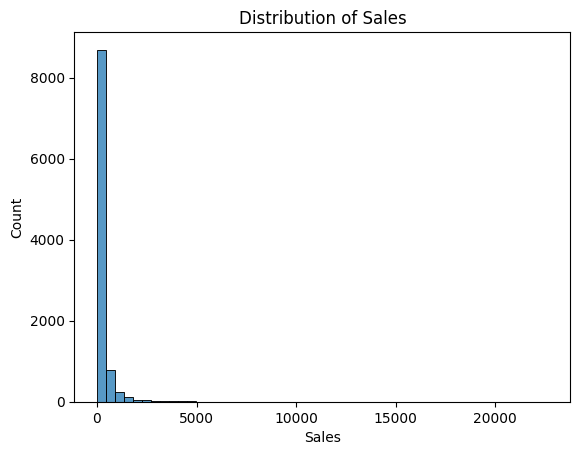

In [ ]:
sns.histplot(df['Sales'],bins=50)
plt.title("Distribution of Sales")
plt.show()


## **Insight from Distribution of Sales**

** The sales distribution is highly right-skewed, with most orders having low sales values (below ₹1000), and a few very high-value sales going up to ₹22,000.

** This suggests that the company relies heavily on a large volume of small sales.

** Recommendation: Focus on increasing average order value or encouraging upselling in low-ticket items.

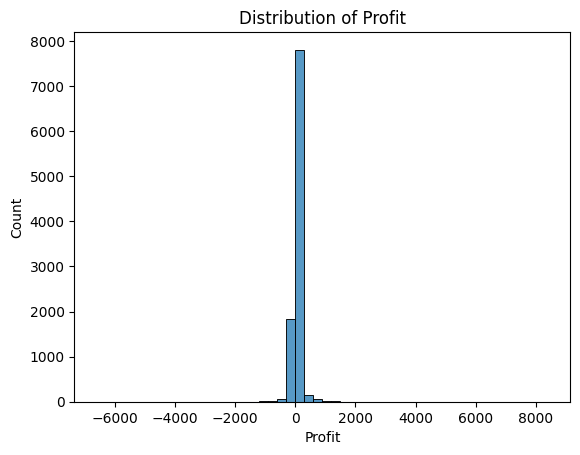

In [ ]:
sns.histplot(df['Profit'],bins = 50)
plt.title("Distribution of Profit")
plt.show()

## 5. 📉 Outlier Detection

## **Insight from Distribution of Profit**

**The profit distribution appears centered around 0, but has a long tail on both the loss and gain side. Many orders fall near zero profit, and a noticeable number of transactions show negative profit, going as low as ₹-6599.

** This indicates that the business is experiencing both profitable and loss-making orders.

** Recommendation: Identify the loss-making products or regions, especially where discounts are high, to reduce the negative profit margin.

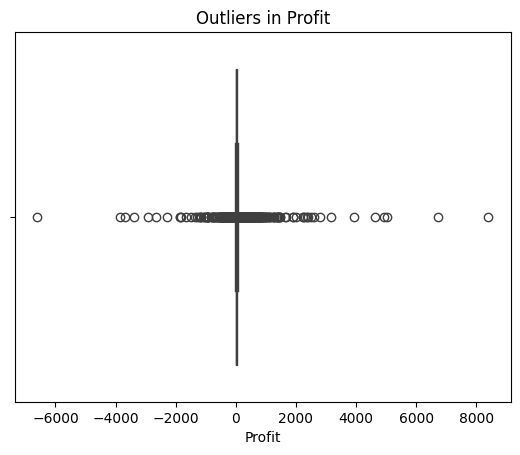

In [ ]:
sns.boxplot(x=df['Profit'])
plt.title("Outliers in Profit")
plt.show()



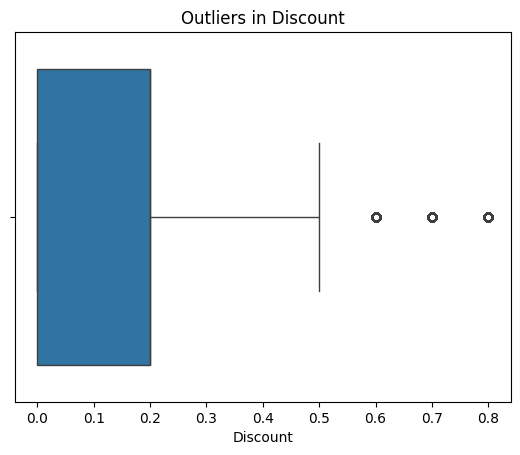

In [ ]:
sns.boxplot(x=df['Discount'])
plt.title("Outliers in Discount")
plt.show()

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 6. 🌍 Regional & City-Level Profit Analysis

There is no null values in data


## **Use Grouping to Summarize**

In [ ]:
region_profit=df.groupby('Region')['Profit'].sum().reset_index()
region_profit

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


Insights:

 " West " and " East " Regions are generate the highest profits compare to " South and Central".while central is poor region performance.


## **CITIES  With Highest Loss**

## 7. 🏷️ Category & Sub-Category Sales

In [ ]:
df.groupby('City')['Profit'].sum().sort_values().head(5)

,Profit
City,
Philadelphia,-13837.7674
Houston,-10153.5485
San Antonio,-7299.0502
Lancaster,-7239.0684
Chicago,-6654.5688


Insight:

The City "Philadelphia" is most loss making Location,which may be due to low sales volume or deep discounts,Investigating this city can help over all reduces.


In [ ]:
top3=df.groupby('Category')['Sales'].sum().nlargest(3)
top3

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


## 8. 🔄 Discount Impact on Profit

## **Explore Correlation**

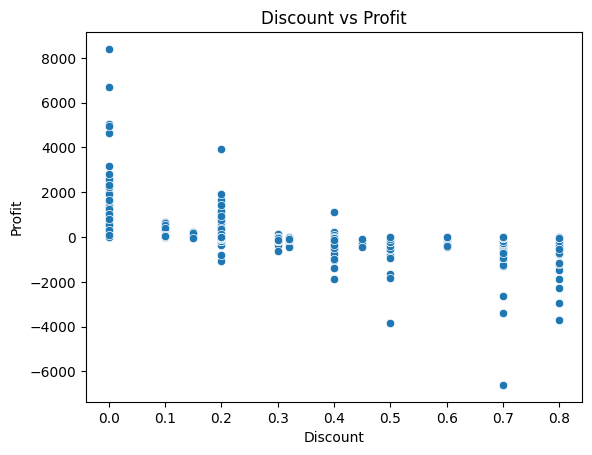

In [ ]:
sns.scatterplot(data=df,x="Discount",y="Profit")
plt.title("Discount vs Profit")
plt.show()

Insights:

A Scatter Plot negtive trend between discount and profit as
the discount increases,the profit trends to decrease.

Many orders with discount 40% in losses,the highest profit observed no discounts.

This suggests that aggressive discounting may be hurting profitability. The business should re-evaluate high-discount strategies, especially for categories where discounts do not drive profitable sales.

<Axes: xlabel='Month'>

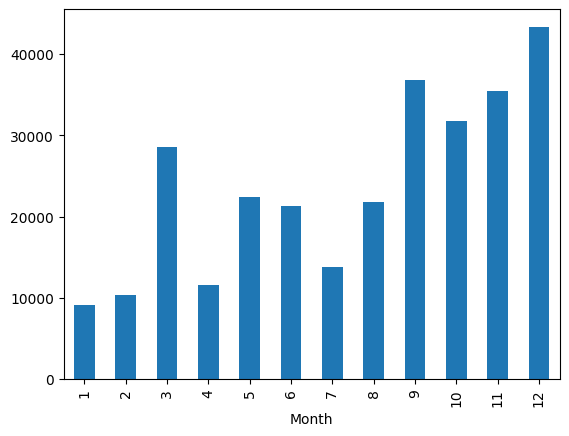

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df.groupby('Month')['Profit'].sum().plot(kind='bar')



## 9. 📆 Seasonality Trends

The monthly sales trend shows a significant peak in December, followed by high sales in September and November.

This pattern suggests that Q4 (October to December) is the most profitable quarter, likely due to holiday season, year-end purchases, and promotional campaigns.

 The business should consider strategically increasing marketing and inventory in these months to maximize revenue


 The data shows that [month/quarter] has the highest [sales/profit/volume], while [other months] are comparatively lower.

 This indicates [seasonal behavior / customer pattern], possibly driven by [reason like holidays, festivals, etc.].

 The business should [plan promotions / stock inventory / run offers] during this period to optimize performance.

**Segment Analysis**

Which customer segment is most profitable?
Bonus: What actions would you recommend based on this?



In [ ]:
df.groupby('Segment')['Profit'].sum().nlargest()


,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


 Sub-Category Loss

Which sub-category consistently shows negative profit, even if sales are good?

## 10. 👥 Segment & Customer Behavior

The Consumer segment is the most profitable, contributing
over ₹1.34 lakh in total profit.

The business should continue to target consumers with personalized offers and consider cross-selling within this group.

In [ ]:
df.groupby('Sub-Category')['Profit'].sum().sort_values().head(5)

,Profit
Sub-Category,
Tables,-17725.4811
Bookcases,-3472.5560
Supplies,-1189.0995
Fasteners,949.5182
Machines,3384.7569


State-Level Insight
Identify top 3 states by total profit and bottom 3 by total loss.


In [ ]:
total_profit_state_smallest=df.groupby('State')['Profit'].sum().nsmallest()
total_profit_state_smallest


,Profit
State,
Texas,-25729.3563
Ohio,-16971.3766
Pennsylvania,-15559.9603
Illinois,-12607.8870
North Carolina,-7490.9122


In [ ]:
total_profit_state_highest=df.groupby('State')['Profit'].sum().nlargest()
total_profit_state_highest

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504


## 11. 🧠 Business Insights & Recommendations

Ship Mode Impact

Analyze if Ship Mode affects delivery time or profit.

In [ ]:
ship_mode_profit=df.groupby('Ship Mode')['Profit'].sum()
ship_mode_profit

,Profit
Ship Mode,
First Class,48969.8399
Same Day,15891.7589
Second Class,57446.6354
Standard Class,164088.7875


Customer Insights

Are repeat customers buying more often, or just once?
(Hint: Count Customer ID frequency)

In [ ]:
df['Customer ID'].value_counts().head(100)

,count
Customer ID,
WB-21850,37
MA-17560,34
JL-15835,34
PP-18955,34
CK-12205,32
...,...
JK-15730,20
HW-14935,20
BP-11095,20


## **Time Series + Strategy**

<Axes: xlabel='Year,Month'>

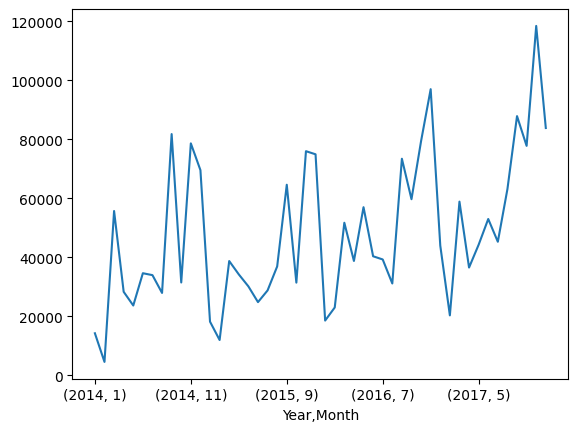

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby(['Year' , 'Month'])['Sales'].sum()
monthly_sales.plot()